In [13]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Set the path to your dataset directory
dataset_dir = 'D:\\root\\data'

In [15]:
w_maskDir  = os.path.join(dataset_dir, 'with_mask')
n_maskDir = os.path.join(dataset_dir, 'without_mask')

In [16]:
print(os.listdir(dataset_dir))

['without_mask', 'with_mask']


In [17]:
# Get the list of all image files in each category
w_mask_file = [os.path.join(w_maskDir, file) for file in os.listdir(w_maskDir) if file.endswith('.jpg')]
n_mask_file = [os.path.join(n_maskDir, file) for file in os.listdir(n_maskDir) if file.endswith('.jpg')]

In [18]:
# Shuffle the file lists to ensure randomness
random.shuffle(w_mask_file)
random.shuffle(n_mask_file)

In [19]:
# Define the ratio of data to be used for training
train_ratio = 0.8

In [20]:
# Split the data into training and testing sets
w_mask_train_files = w_mask_file[:int(train_ratio * len(w_mask_file))]
w_mask_test_files = w_mask_file[int(train_ratio * len(w_mask_file)):]

In [21]:
n_mask_train_files = n_mask_file[:int(train_ratio * len(n_mask_file))]
n_mask_test_files = n_mask_file[int(train_ratio * len(n_mask_file)):]

In [22]:
# Define the ImageDataGenerator for preprocessing and data augmentationb
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [23]:
# Create a directory for both training and testing data in the specified path
train_test_dir = 'D:\\root\\train_test'
os.makedirs(train_test_dir, exist_ok=True)

# Create directories for each class in training and testing sets
train_dir = os.path.join(train_test_dir, 'train_data')
test_dir = os.path.join(train_test_dir, 'test_data')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [24]:
# Create directories for each class inside the training directory
w_mask_train_dir = os.path.join(train_dir, 'with_mask')
n_mask_train_dir = os.path.join(train_dir, 'without_mask')

os.makedirs(w_mask_train_dir, exist_ok=True)
os.makedirs(n_mask_train_dir, exist_ok=True)

# Create directories for each class inside the testing directory
w_mask_test_dir = os.path.join(test_dir, 'with_mask')
n_mask_test_dir = os.path.join(test_dir, 'without_mask')

os.makedirs(w_mask_test_dir, exist_ok=True)
os.makedirs(n_mask_test_dir, exist_ok=True)

In [27]:
import shutil
# Copy training files to class-specific directories in the training directory
for i, file_path in enumerate(w_mask_train_files):
    shutil.copy(file_path, os.path.join(w_mask_train_dir, f"{i}.jpg"))

for i, file_path in enumerate(n_mask_train_files):
    shutil.copy(file_path, os.path.join(n_mask_train_dir, f"{i}.jpg"))

# Copy testing files to class-specific directories in the testing directory
for i, file_path in enumerate(w_mask_test_files):
    shutil.copy(file_path, os.path.join(w_mask_test_dir, f"{i}.jpg"))

for i, file_path in enumerate(n_mask_test_files):
    shutil.copy(file_path, os.path.join(n_mask_test_dir, f"{i}.jpg"))

In [28]:
img_width = 300
img_height = 300
batch_size = 64

In [29]:
train_generator = datagen.flow_from_directory(
    'D:\\root\\train_test\\train_data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 6042 images belonging to 2 classes.


In [30]:
test_generator = datagen.flow_from_directory(
    'D:\\root\\train_test\\test_data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 1511 images belonging to 2 classes.


In [22]:
# Count the number of images in training and testing sets
num_train_images = len(train_files)
num_test_images = len(test_files)

print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")

Number of training images: 6042
Number of testing images: 1511


In [50]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [65]:
# classifier = Sequential()
# classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
# classifier.add(Conv2D(32,(3,3),activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
# classifier.add(Flatten())
# classifier.add(Dense(units=128,activation='relu'))
# classifier.add(Dense(units=1,activation='sigmoid'))
# adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
# classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
# #tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [97]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation='relu',
                                  input_shape=(64, 64, 3)),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tensorflow.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation='relu'),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tensorflow.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(

    optimizer=tensorflow.keras.optimizers.Adam(lr=0.001),

    loss=tensorflow.keras.losses.BinaryCrossentropy(),

    metrics=['accuracy']

)

In [98]:

# Fit the model using the data generator
history = model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=20,
    validation_data=test_generator,
    validation_steps=40
)

Epoch 1/20
 49/150 [========>.....................] - ETA: 31s - loss: 0.5668 - accuracy: 0.7111

D:\python anaconda\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


150/150 [==============================] - 62s 400ms/step - loss: 0.4080 - accuracy: 0.8135 - val_loss: 0.2912 - val_accuracy: 0.8781
Epoch 2/20
150/150 [==============================] - 64s 427ms/step - loss: 0.2795 - accuracy: 0.8876 - val_loss: 0.2389 - val_accuracy: 0.9031
Epoch 3/20
150/150 [==============================] - 52s 348ms/step - loss: 0.2353 - accuracy: 0.9059 - val_loss: 0.2124 - val_accuracy: 0.9180
Epoch 4/20
150/150 [==============================] - 47s 311ms/step - loss: 0.2037 - accuracy: 0.9199 - val_loss: 0.1923 - val_accuracy: 0.9320
Epoch 5/20
150/150 [==============================] - 45s 303ms/step - loss: 0.1818 - accuracy: 0.9330 - val_loss: 0.1764 - val_accuracy: 0.9383
Epoch 6/20
150/150 [==============================] - 46s 304ms/step - loss: 0.1728 - accuracy: 0.9360 - val_loss: 0.1685 - val_accuracy: 0.9344
Epoch 7/20
150/150 [==============================] - 63s 419ms/step - loss: 0.1666 - accuracy: 0.9379 - val_loss: 0.1779 - val_accuracy: 0.9

In [99]:
# Evaluate the model on the test set.

model.evaluate(test_generator)



48/48 [==============================] - 10s 217ms/step - loss: 0.1104 - accuracy: 0.9610


[0.1104290559887886, 0.9609529972076416]

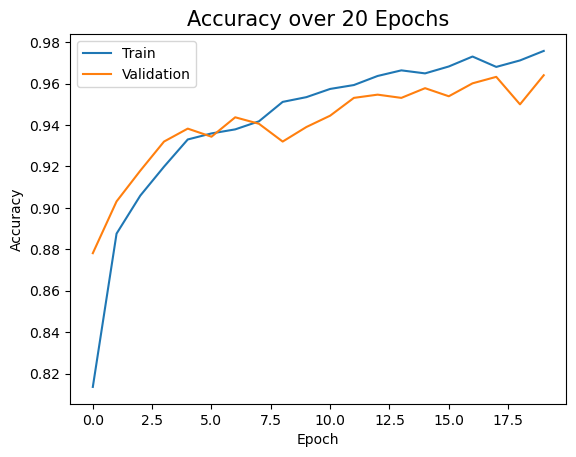

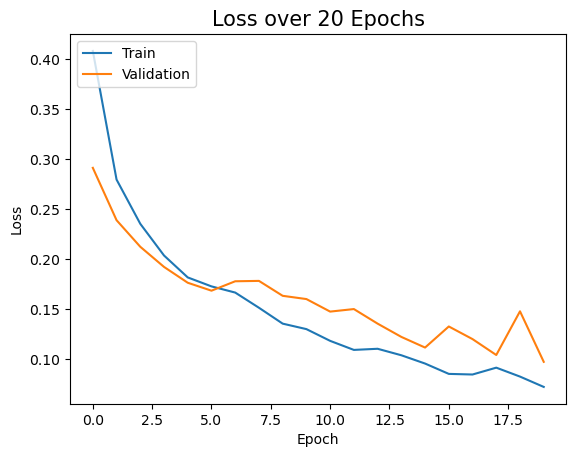

In [100]:
import matplotlib.pyplot as plt

def plot_acc_loss(history, epochs):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_acc_loss(history, 20)

In [102]:
model.save('mask_find.keras')

In [103]:
model.save('D:\\root\\mask_find.keras')

In [1]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mask_find.keras')


1/1 [==============================] - 0s 29ms/step


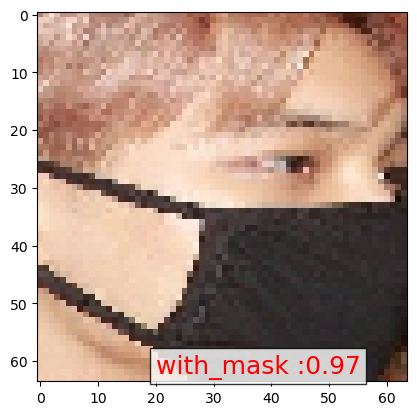

In [34]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('D:/root/train_test/test_data/with_mask/1.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='without_mask :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='with_mask :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [11]:
loaded_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 31, 31, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 6, 6, 32)        

In [31]:
import pandas as pd
test_generator.reset
ytesthat = loaded_model.predict_generator(test_generator)#`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict':ytesthat[:,0],
    'y':test_generator.classes
})

C:\Users\Dell\AppData\Local\Temp\ipykernel_2556\616238968.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = loaded_model.predict_generator(test_generator)


In [32]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,with_mask\0.jpg,0.94180,0,1
1,with_mask\1.jpg,0.14363,0,0
2,with_mask\10.jpg,0.99785,0,1
3,with_mask\100.jpg,0.00148,0,0
4,with_mask\101.jpg,0.00025,0,0
5,with_mask\102.jpg,0.81920,0,1
6,with_mask\103.jpg,0.97266,0,1
7,with_mask\104.jpg,0.72226,0,1
8,with_mask\105.jpg,0.00102,0,0
9,with_mask\106.jpg,0.73551,0,1


In [35]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 1152 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 1152 Validation images : 740


In [36]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg

maskWN = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/'+maskWN.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test/with_mask\\0.jpg'

<Figure size 1500x600 with 0 Axes>